In [1]:
from reactome2py import content, analysis
import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "./without_sulfo/compassionate_buck-v2/Leiden-0.5/nodes.csv"
FLD = os.path.split(data_path)[0]

---

In [2]:
combo = pd.read_csv(os.path.join(FLD,'results_combo.csv'))
combo

,species_id,stId,name,FDR,entities_tot,entities_found,reactions_tot,reactions_found,cluster
0,9606,R-HSA-1640170,[R-HSA-1640170] Cell Cycle,4.465643e-08,729,39,474,175,C01
1,9606,R-HSA-69278,"[R-HSA-69278] Cell Cycle, Mitotic",3.582679e-06,587,31,367,135,C01
2,9606,R-HSA-194315,[R-HSA-194315] Signaling by Rho GTPases,1.452325e-05,708,33,203,62,C01
3,9606,R-HSA-9716542,"[R-HSA-9716542] Signaling by Rho GTPases, Miro...",1.817710e-05,724,33,212,62,C01
4,9606,R-HSA-68877,[R-HSA-68877] Mitotic Prometaphase,8.625594e-05,212,16,25,13,C01
...,...,...,...,...,...,...,...,...,...
147,9606,R-HSA-9665245,[R-HSA-9665245] Resistance of ERBB2 KD mutants...,2.169920e-03,4,3,1,1,C21
148,9606,R-HSA-4839726,[R-HSA-4839726] Chromatin organization,9.068916e-04,269,7,105,20,C22
149,9606,R-HSA-3247509,[R-HSA-3247509] Chromatin modifying enzymes,9.068916e-04,254,7,85,14,C22
150,9606,R-HSA-9772755,[R-HSA-9772755] Formation of WDR5-containing h...,1.636295e-02,42,3,30,10,C22


In [3]:
results_heatmap = combo.pivot(
    index='name',
    columns='cluster',
    values='FDR'
)
results_heatmap = -1 * np.log10(results_heatmap)
results_heatmap.to_csv(os.path.join(FLD,'results_combo_heatmap.csv'))

In [4]:
reac_clusters = pd.read_csv('ReactomePathsClusters.csv', usecols=['name'])
reac_clusters = reac_clusters.merge(results_heatmap.reset_index(), on='name')
reac_clusters.set_index('name', inplace=True)

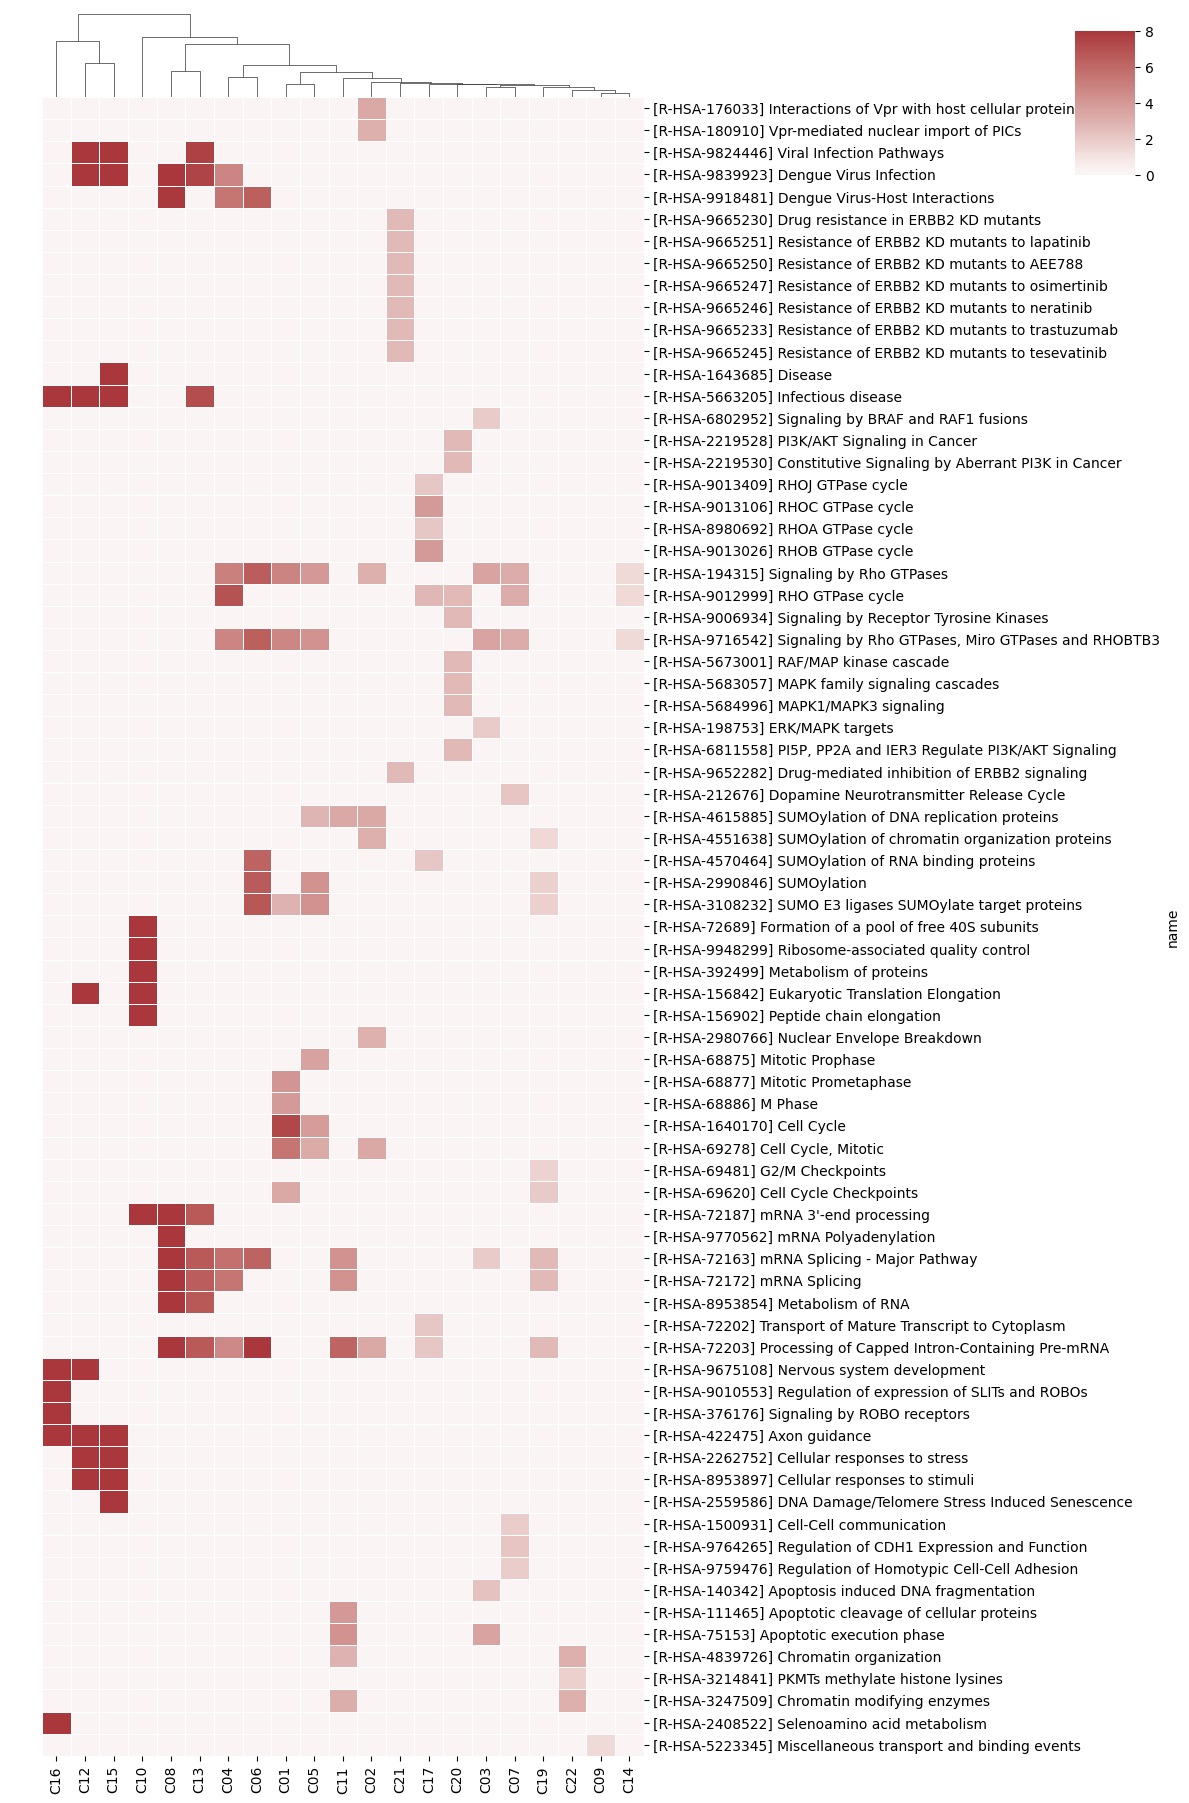

In [5]:
h = sns.clustermap(reac_clusters.fillna(0), method='ward', 
               vmin=0, vmax=8,
               cmap='vlag', center=0, linewidths=0.5, figsize=(12,18),
              cbar_pos=(0.9, 0.9, 0.05, 0.08),
                   # cbar_pos=None,
                   row_cluster=False,
              dendrogram_ratio=.05,)
# plt.xticks(rotation=90)
h.ax_heatmap.set_xticklabels(h.ax_heatmap.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(FLD,'Reactome_clustermap_with_legend.png'), dpi=300, bbox_inches='tight')

---------